# Анализ медицинского центра

Автор:  Юрий Кузнецов

Дата: 21.04.2025

## Введение

В этом проекте проанализируем данные федерального медицинского центра ФГБОУ ВО СПбГПМУ. Нужно узнать, какие факторы влияют на время, которое занимает процесс от выдачи направления до поступления в медицинский центр.

Описание данных
В нашем распоряжении имеется таблица hospital.csv — в ней данные федерального медицинского центра ФГБОУ ВО СПбГПМУ.

Поля таблицы hospital.csv:

- `ДАТА_ПОСТУПЛЕНИЯ` — дата поступления пациента в отделение;
- `ДАТА_ВЫПИСКИ` — дата выписки пациента из отделения;
- `УНИКАЛЬНЫЙ_ID` — идентификатор пациента;
- `НОМЕР_ИБ` — системное поле (номер информационной безопасности);
- `ШИФР` — системное поле;
- `РЕГИОН` — регион проживания пациента;
- `ПЛАТЕЛЬЩИК` — наименование плательщика;
- `ИСТОЧНИК_ФИНАНСИРОВАНИЯ`— ОМС или другой вариант;
- `ОТДЕЛЕНИЕ`— название отделения;
- `ПРОФИЛЬ` — профиль отделения (например, терапия, хирургия);
- `КОЙКО_ДНИ`— количество дней лечения в стационаре;
- `ПЛАНОВО_ЭКСТРЕННО`— поступил планово или экстренно;
- `КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ`— код диагноза при поступлении;
- `КОД_МКБ_ПРИ_ВЫПИСКЕ`— код диагноза при выписке.

# Задачи:
Шаг 1. Подготовка данных
- Посчитать и сохранить данные в отдельный датафрейм.
- Выбрать более оптимальные варианты для названий (меток) столбцов и заменить их.
- Изучить, встречаются ли пропуски в данных и в каких столбцах. Обработать их.
- Проверить, используются ли корректные типы данных. Предложитить свои рекомендации по изменению.
- Изучить дубликаты. Удалить их при надобности.
  
Шаг 2. Исследовательский анализ данных
- Изучить распределение длительности госпитализации пациентов. В этом поможет гистограмма, или «ящик с усами».
- Изучить среднюю длительность госпитализации по отделениям. Изучить десять отделений, где длительности госпитализации пациентов наибольшая.
- Исследовать динамику количества поступивших пациентов в разные месяцы (учитывая различия в годах).
  
Шаг 3. Проверка гипотез
- Руководство хочет проверить, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока. Проверить эту гипотезу.
- Медицинский отдел хочет проверить, превышает ли средняя длительность госпитализации пациентов 10 дней.
- Проверить, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

# Шаг 1. Подготовка данных

Подключим необходимые для работы с данными библиотеки

In [1]:
    try:
        import phik
    except ImportError:
        !pip install phik
        import phik 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import numpy as np

In [3]:
import scipy.stats as st

Загрузим данные

In [4]:
df_hospital = pd.read_csv('hospital.csv')

In [5]:
df_hospital.head()

,ДАТА_ПОСТУПЛЕНИЯ,ДАТА_ВЫПИСКИ,УНИКАЛЬНЫЙ_ID,НОМЕР_ИБ,ШИФР,РЕГИОН,ПЛАТЕЛЬЩИК,ИСТОЧНИК_ФИНАНСИРОВАНИЯ,ОТДЕЛЕНИЕ,ПРОФИЛЬ,КОЙКО_ДНИ,ПЛАНОВО_ЭКСТРЕННО,КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ,КОД_МКБ_ПРИ_ВЫПИСКЕ
0,01.01.2019,10.01.2019,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10.0,Экстренная,S61.7,S66.4
1,01.01.2019,01.01.2019,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
2,01.01.2019,01.01.2019,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
3,01.01.2019,07.01.2019,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7.0,Экстренная,B27.9,J03.9
4,01.01.2019,05.01.2019,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5.0,Плановая,O42.9,O82.1


In [6]:
df_hospital.columns

Index(['ДАТА_ПОСТУПЛЕНИЯ', 'ДАТА_ВЫПИСКИ', 'УНИКАЛЬНЫЙ_ID', 'НОМЕР_ИБ', 'ШИФР',
       'РЕГИОН', 'ПЛАТЕЛЬЩИК', 'ИСТОЧНИК_ФИНАНСИРОВАНИЯ', 'ОТДЕЛЕНИЕ',
       'ПРОФИЛЬ', 'КОЙКО_ДНИ', 'ПЛАНОВО_ЭКСТРЕННО', 'КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ',
       'КОД_МКБ_ПРИ_ВЫПИСКЕ'],
      dtype='object')

Названия столбцов имеют некорректный формат. Приведем его к формату snake_case.
Для этого сначала создадим новый список имен для столбцов.

In [7]:
columns_names_hospital = [
    'admission_date',
    'discharge_date',
    'unique_id',
    'medical_record_number',
    'code',
    'region',
    'payer',
    'funding_source',
    'department',
    'profile',
    'bed_days',
    'planned_emergency',
    'admission_icd_code',
    'discharge_icd_code'
]

In [8]:
df_hospital.columns = columns_names_hospital

Посмотрим типы данных

In [9]:
df_hospital.dtypes

admission_date            object
discharge_date            object
unique_id                  int64
medical_record_number      int64
code                      object
region                    object
payer                     object
funding_source            object
department                object
profile                   object
bed_days                 float64
planned_emergency         object
admission_icd_code        object
discharge_icd_code        object
dtype: object

- Поля `admission_date` и `discharge_date` необходимо привести к типу `date` 
- `bed_days` к `int`  
- Можно понизить разрядность числовых типов для экономии памяти

In [10]:
df_hospital['admission_date'] = pd.to_datetime(df_hospital['admission_date'], format = '%d.%m.%Y')
df_hospital['discharge_date'] = pd.to_datetime(df_hospital['discharge_date'], format = '%d.%m.%Y')


In [11]:
df_hospital['bed_days'] = df_hospital['bed_days'].round().astype('int')                

In [12]:
df_hospital['unique_id'] = pd.to_numeric(df_hospital['unique_id'], downcast = 'integer')
df_hospital['medical_record_number'] = pd.to_numeric(df_hospital['medical_record_number'], downcast = 'integer')
df_hospital['bed_days'] = pd.to_numeric(df_hospital['bed_days'], downcast = 'integer')


Проверим датасет на пропуски

In [13]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125261 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   admission_date         125261 non-null  datetime64[ns]
 1   discharge_date         125261 non-null  datetime64[ns]
 2   unique_id              125261 non-null  int32         
 3   medical_record_number  125261 non-null  int32         
 4   code                   125261 non-null  object        
 5   region                 56391 non-null   object        
 6   payer                  125261 non-null  object        
 7   funding_source         125261 non-null  object        
 8   department             125261 non-null  object        
 9   profile                125261 non-null  object        
 10  bed_days               125261 non-null  int16         
 11  planned_emergency      125261 non-null  object        
 12  admission_icd_code     125253 non-null  obje

Столбец `region` имеет более половины пропущенных значений. 
`admission_icd_code` - 8 пропущенных значений.                      

In [14]:
df_hospital['region'].unique()

array([nan, 'Ленинградская обл.', 'Владимирская обл.', 'Приморский край',
       'Оренбургская обл.', 'Смоленская обл.', 'Краснодарский край',
       'Респ-ка Узбекистан', 'Нижегородская обл.', 'г. Москва',
       'Вологодская обл.', 'Ростовская обл.', 'Самарская обл.',
       'Тверская обл.', 'Амурская область', 'Псковская обл.',
       'Республика Мордовия', 'Республика Карелия', 'Омская обл.',
       'Калининградская обл.', 'Новгородская обл.', 'Республика Калмыкия',
       'Тюменская обл.', 'Республика Коми', 'Ханты-Мансийский АО',
       'Пермский край', 'Ямало-Ненецкий АО', 'Новосибирская обл.',
       'Республика Дагестан', 'Мурманская обл.', 'Красноярский край',
       'Азербайджанская респ', 'Саратовская обл.', 'Дальнее зарубежье',
       'Московская обл.', 'Республика Татарстан', 'Республика Бурятия',
       'Свердловская обл.', 'Карач.-Черкесск.респ', 'Волгоградская обл.',
       'Респ. Башкортостан', 'г.Севастополь', 'Кемеровская обл.',
       'Пензенская обл.', 'Респ.Север

In [15]:
df_hospital['region'] = df_hospital['region'].replace(['-', '\\', 'Неидентифицированные'], 'Данные отсутствуют')
df_hospital['region'] = df_hospital['region'].fillna('Данные отсутствуют')

Также значения в этом столбце требуют очистки и преобразования имен для эффективной категоризации.

Сделаем это

In [16]:
df_hospital['region'] = df_hospital['region'].str.strip()
df_hospital['region'] = df_hospital['region'].replace(['Лениградская обл.', 'лен обл'], 'Ленинградская область')
df_hospital['region'] = df_hospital['region'].replace(['Луганская Народная Республика', 
                                                       'Луганская Народная республика', 
                                                       'Луганская область',
                                                       'Республика ЛНР'], 
                                                       'ЛНР')
df_hospital['region'] = df_hospital['region'].replace(['Республика Донецкая Народная', 
                                                       'Донецкая обл.'], 
                                                       'ДНР')
df_hospital['region'] = df_hospital['region'].replace('РеспубликаСеверная Осетия', 'Республика Северная Осетия')
df_hospital['region'] = df_hospital['region'].replace('Кабард.-Балкарс.респ', 'Кабардино-Балкарская Республика')
df_hospital['region'] = df_hospital['region'].replace('Агинск.Бурят.АО(Ф93)', 'Бурятский АО')
df_hospital['region'] = df_hospital['region'].replace('Карач.-Черкесск.респ', 'Карачаево-Черкесская Республика')
df_hospital['region'] = df_hospital['region'].astype(str)
df_hospital['region'] = df_hospital['region'].str.replace(r'(?i)\b(Область)\b', 'обл.', regex=True)
df_hospital['region'] = df_hospital['region'].str.replace(r'(Респ.|респ|Р-ка|Республика|республ.|Респ-ка|Республика-ка)\b', 'Республика', regex=True)
df_hospital['region'] = df_hospital['region'].str.replace(r'(Респ.)\b', 'Республика', regex=True)
df_hospital['region'] = df_hospital['region'].replace('Кыргызская Республика-ка', 'Кыргызская Республика')
df_hospital['region'] = df_hospital['region'].replace('Респ. Башкортостан', 'Республика Башкортостан')
df_hospital['region'] = df_hospital['region'].replace('РеспубликаСеверная Осетия', 'Республика Северная Осетия')
df_hospital['region'] = df_hospital['region'].replace('Республикака Туркменистан', 'Республика Туркменистан')
df_hospital['region'] = df_hospital['region'].replace('Удмуртская республ.', 'Удмуртская республика')

In [17]:
df_hospital['region'].unique()

array(['Данные отсутствуют', 'Ленинградская обл.', 'Владимирская обл.',
       'Приморский край', 'Оренбургская обл.', 'Смоленская обл.',
       'Краснодарский край', 'Республикака Узбекистан',
       'Нижегородская обл.', 'г. Москва', 'Вологодская обл.',
       'Ростовская обл.', 'Самарская обл.', 'Тверская обл.',
       'Амурская обл.', 'Псковская обл.', 'Республика Мордовия',
       'Республика Карелия', 'Омская обл.', 'Калининградская обл.',
       'Новгородская обл.', 'Республика Калмыкия', 'Тюменская обл.',
       'Республика Коми', 'Ханты-Мансийский АО', 'Пермский край',
       'Ямало-Ненецкий АО', 'Новосибирская обл.', 'Республика Дагестан',
       'Мурманская обл.', 'Красноярский край',
       'Азербайджанская Республика', 'Саратовская обл.',
       'Дальнее зарубежье', 'Московская обл.', 'Республика Татарстан',
       'Республика Бурятия', 'Свердловская обл.',
       'Карачаево-Черкесская Республика', 'Волгоградская обл.',
       'Республика Башкортостан', 'г.Севастополь', 'К

Пропуски в столбце `admission_icd_code` оставим как есть.    

Проверим датасет на наличие дубликатов.

Выведем число полных строк дубликатов

In [18]:
df_hospital.duplicated(keep=False).sum()

8820

В датасете имеется 8820 дублирующихся строк.

Удалим их.

In [19]:
df_hospital = df_hospital.drop_duplicates()

Проверим дубликаты по номеру истории болезни `medical_record_number` и дате поступления `admission_date`

In [20]:
df_hospital.duplicated(subset = ['medical_record_number', 'admission_date'], keep=False).sum()

34

Обнаружено 34 дубликата.

Удалим их.

In [21]:
df_hospital = df_hospital.drop_duplicates(subset = ['medical_record_number', 'admission_date'])

In [22]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120829 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   admission_date         120829 non-null  datetime64[ns]
 1   discharge_date         120829 non-null  datetime64[ns]
 2   unique_id              120829 non-null  int32         
 3   medical_record_number  120829 non-null  int32         
 4   code                   120829 non-null  object        
 5   region                 120829 non-null  object        
 6   payer                  120829 non-null  object        
 7   funding_source         120829 non-null  object        
 8   department             120829 non-null  object        
 9   profile                120829 non-null  object        
 10  bed_days               120829 non-null  int16         
 11  planned_emergency      120829 non-null  object        
 12  admission_icd_code     120821 non-null  object   

В результате преобразования получили датасет `df_hospital` состоящий из 120829 строк и 14 столбцов, занимающий объем памяти 12.2 Мб(~30 Мб в исходном), полностью готовый для дальнейшего анализа

### Промежуточные выводы

В ходе первичного анализа в данных были обнаружены несоостветствия типов, названий и содержимого полей. Была проведена предобработка в ходе которой было:
- все названия полей приведены к стандарту `snake_case`,
- значения в столбце `region` обработаны от неявных повторений,
- выявлены и, где это необходимо, заполнены пропуски в данных, 
- обнаружены и удалены явные и неявные дубликаты,
- получен готовый датасет `df_hospital` состоящий из 120829 строк и 14 столбцов. 

# Шаг 2. Исследовательский анализ данных

## 2.1 Изучение распределение длительности госпитализации пациентов. В этом поможет гистограмма, или «ящик с усами».


Для этого нам понадобится столбец с количеством койко-дней `bed_days`.

Построим диаграмму размаха значений этого поля

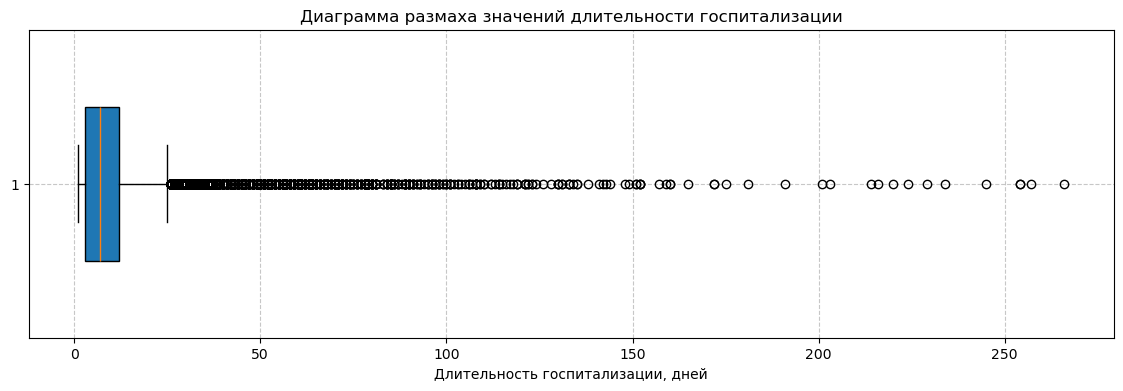

In [23]:
bed_days = df_hospital['bed_days']
plt.figure(figsize=(14, 4))
plt.boxplot(bed_days, 
            vert=False,
            widths=0.5,
            patch_artist=True) 
plt.title("Диаграмма размаха значений длительности госпитализации")
plt.xlabel("Длительность госпитализации, дней")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Разброс значений койко-дней имеет выраженный правый хвост выбросов, некоторые значения которых превышают 250 койко-дней. Однако медиана находится около центра IQR с небольшим сдвигом в область малых значений, что говорит об их преимуществе.

Отфильтруем выбросы и рассмотрим ближе область IQR

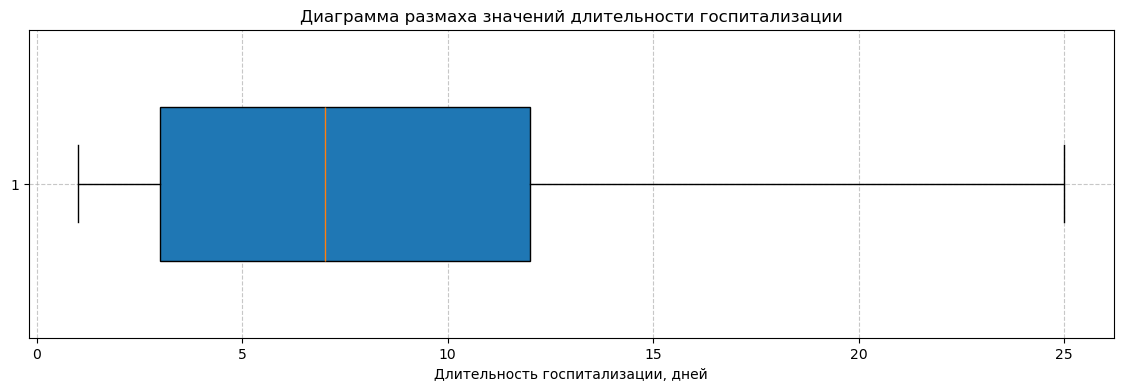

In [85]:
bed_days = df_hospital['bed_days']
plt.figure(figsize=(14, 4))
plt.boxplot(bed_days, 
            vert=False,
            showfliers=False,
            widths=0.5,
            patch_artist=True
            ) 
plt.title("Диаграмма размаха значений длительности госпитализации")
plt.xlabel("Длительность госпитализации, дней")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
showfliers=False,

На диаграмме видно, что центральная тенденция значений сосредоточена в диапазоне от 3 до 12 дней с медианой около 6 дней. Минимальное значение 1, максимальное 25 койко-дней.

## 2.2 Изучение средней длительности госпитализации по отделениям. Десять отделений, где длительности госпитализации пациентов наибольшая.


Для этого нужно сгруппировать датасет по полю `department` и вычислить для каждой категории среднее значения поля `bed_days`                             

In [25]:
df_department_days = df_hospital.groupby('department')['bed_days'].mean().sort_values(ascending = False).head(10).reset_index()

Построим линейчатую диаграмму топ 10 отделений по длительности госпитализации

C:\Users\urize\AppData\Local\Temp\ipykernel_9636\1317366989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="bed_days",


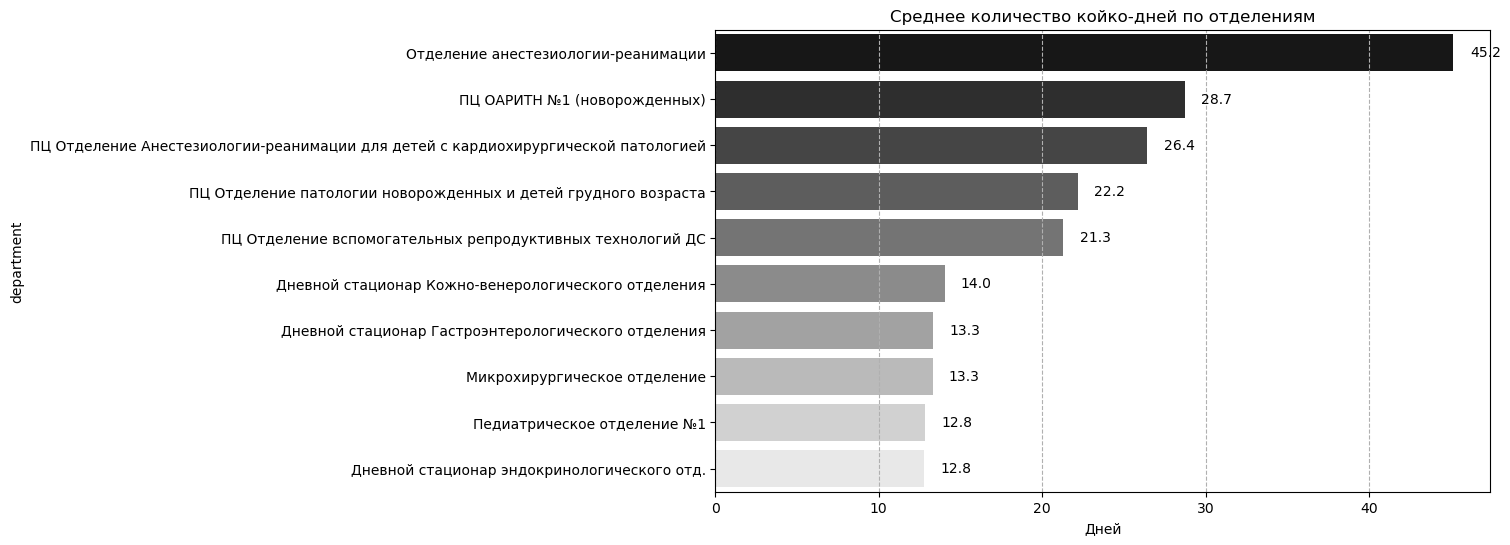

In [78]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="bed_days", 
                 y="department", 
                 data=df_department_days, 
                 orient="h",
                 palette="grey")
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, 
            p.get_y() + p.get_height() / 2, 
            f'{width:.1f}',
            ha='left',      
            va='center',
            fontsize=10)
plt.title("Среднее количество койко-дней по отделениям")
plt.xlabel("Дней")
plt.grid(axis="x", linestyle="--")
plt.show()

Выведем основные показатели длительностей госпитализации

In [27]:
print(f'Среднее значение длительности госпитализации по всем отделениям: {df_hospital['bed_days'].mean().round(1)} дней')
print(f'Медианное значение длительности госпитализации: {df_hospital['bed_days'].median()} дней') 
print(f'Максимальное значение длительности госпитализации: {df_hospital['bed_days'].max()} дней в {df_hospital['department'][df_hospital['bed_days'].max()]}') 
print(f'Минимальное значение длительности госпитализации: {df_hospital['bed_days'].min()} дней')     

Среднее значение длительности госпитализации по всем отделениям: 8.7 дней
Медианное значение длительности госпитализации: 7.0 дней
Максимальное значение длительности госпитализации: 266 дней в Дневной стационар Гастроэнтерологического отделения
Минимальное значение длительности госпитализации: 1 дней


Максимальная средняя длительность госпитализации в Отделении анестезиологии-реанимации составляет 45.2 дней.

Средняя длительность по всем категориям отделений 8.7 дней, что выше медианы, значение которой 7 дней, что объясняется значительными выбросами в области высоких значений.

Максимальное абсолютное значение длительности госпитализации в дневном стационаре Гастроэнтерологического отделения составила 266 дней.

## 2.3 Исследование динамики количества поступивших пациентов в разные месяцы (учитывая различия в годах).

In [28]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120829 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   admission_date         120829 non-null  datetime64[ns]
 1   discharge_date         120829 non-null  datetime64[ns]
 2   unique_id              120829 non-null  int32         
 3   medical_record_number  120829 non-null  int32         
 4   code                   120829 non-null  object        
 5   region                 120829 non-null  object        
 6   payer                  120829 non-null  object        
 7   funding_source         120829 non-null  object        
 8   department             120829 non-null  object        
 9   profile                120829 non-null  object        
 10  bed_days               120829 non-null  int16         
 11  planned_emergency      120829 non-null  object        
 12  admission_icd_code     120821 non-null  object   

Создадим столбец `год-месяц`

In [29]:
df_hospital['months'] = df_hospital['admission_date'].dt.strftime('%Y-%m')

Чтобы посчитать число поступивших пациентов в месяц нужно сгруппировать датасет по полю `months` и агрегировать по идентификатору пациента `unique_id`

In [30]:
df_hospital_monly = df_hospital.groupby('months')['unique_id'].count().reset_index()

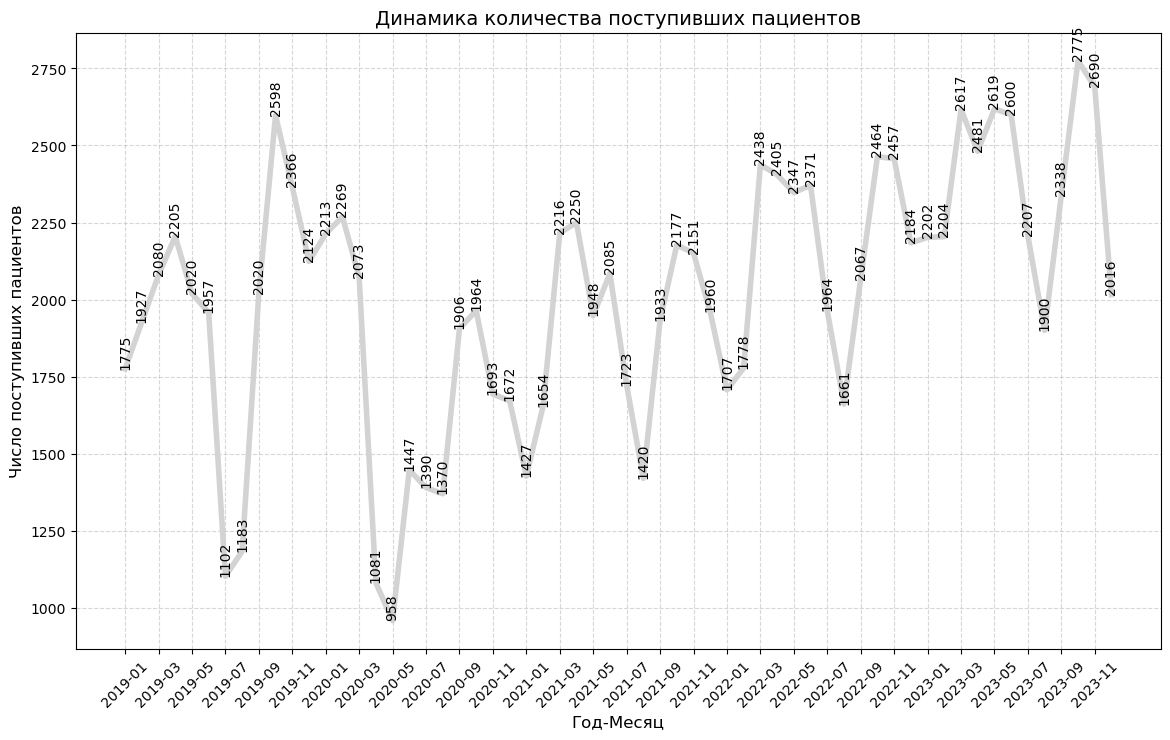

In [68]:
plt.figure(figsize=(14, 8))
plt.plot(
    df_hospital_monly['months'], 
    df_hospital_monly['unique_id'], 
    color='lightgrey', 
    linewidth=4, 
    label='Общее число туров'
)
for xi, yi in zip(df_hospital_monly['months'], df_hospital_monly['unique_id']):
    plt.text(
        xi, yi + 0.1,          
        f"{yi}",               
        ha='center',            
        va='bottom',            
        fontsize=10,
        rotation=90,
        color='black'
    )
plt.title('Динамика количества поступивших пациентов', fontsize=14)
plt.xlabel('Год-Месяц', fontsize=12)
plt.ylabel('Число поступивших пациентов', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(np.arange(0, 60, 2))
plt.xticks(rotation=45)
plt.show() 

Пики: Наибольшее число поступлений в октябре 2019 (2598), мае 2023 (2619) и октябре 2023 (2775)

Снижение: Минимум в мае 2020 (958) и июль 2019 (1102).

Сезонность: Повышение активности госпитализации наблюдается в осенние и весенние периоды, минимумы  летом и зимой (в январе и августе). 

Очевиден тренд на общий рост: осенние пики растут на 12 % в год, а весенние, более интенсивные, на 7 % в год.

С сентября 2019 (с 1183 в августе до 2020 в сентябре) по март 2020 (2073) наблюдается резкое несезонное повышение активности поступления госпитализированных в связи с началом пандемии COVID. В апреле 2020 происходит резкий спад (до 1081)


#### Промежуточные выводы

##### Диаграммы размаха
- Разброс значений койко-дней на диаграмме размаха имеет выраженный правый хвост выбросов, некоторые значения которых превышают 250 койко-дней. Однако медиана находится около центра IQR с небольшим сдвигом в область малых значений, что говорит об их преимуществе.
- Центральная тенденция значений сосредоточена в диапазоне от 3 до 12 дней с медианой около 6 дней. Минимальное значение 1, максимальное 25 койко-дней.

##### Длительность лечения по отделениям
- Максимальная средняя длительность госпитализации в Отделении анестезиологии-реанимации составляет 45.2 дней.
- Средняя длительность по всем категориям отделений 8.7 дней, что выше медианы, значение которой 7 дней, что объясняется значительными выбросами в области высоких значений.
- Максимальное абсолютное значение длительности госпитализации в дневном стационаре Гастроэнтерологического отделения составила 266 дней.

##### Динамика
- Пики: Наибольшее число поступлений в октябре 2019 (2598), мае 2023 (2619) и октябре 2023 (2775)
- Снижение: Минимум в мае 2020 (958) и июль 2019 (1102).
- Сезонность: Повышение активности госпитализации наблюдается в осенние и весенние периоды, минимумы летом и зимой (в январе и августе).
- тренд на общий рост: осенние пики растут на 12 % в год, а весенние, более интенсивные, на 7 % в год.
- С сентября 2019 (с 1183 в августе до 2020 в сентябре) по март 2020 (2073) наблюдается резкое несезонное повышение активности поступления госпитализированных в связи с началом пандемии COVID. В апреле 2020 происходит резкий спад (до 1081)

# Шаг 3. Проверка гипотез

## 3.1. Отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока.

 Проведем статистический тест, в котором 
 - Нулевая гипотеза: длительность госпитализации 7 дней.
 - Альтернативная: не равна 7 дням.       

In [47]:
duration = df_hospital['bed_days'].dropna()
expected_duration = 7
alpha = 0.05
results = st.ttest_1samp(
    duration, 
    expected_duration,
    alternative='two-sided')
print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print("Разница с ожидаемым:", duration.mean() - expected_duration)

p-value: 0.0
Отвергаем нулевую гипотезу
Разница с ожидаемым: 1.730991732117289


По результатам теста нулевая гипетеза отвергается. Значение p-value равно 0. Проверим почему.

Сделаем диагностику значений списка `duration`

Размер выборки: 120829
Среднее: 8.730991732117289
Стандартное отклонение: 8.776689337368197
Минимум/Максимум: 1 266


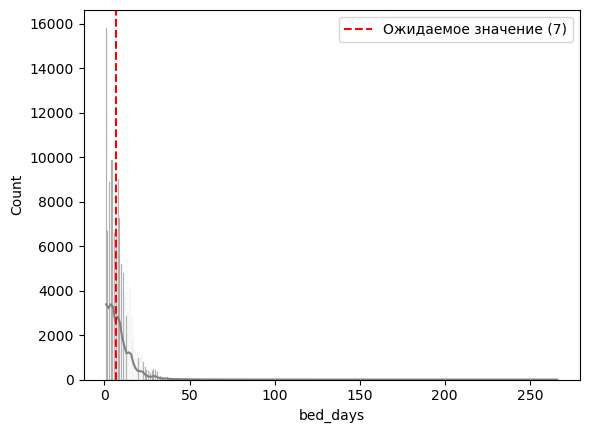

In [69]:
print("Размер выборки:", len(duration))
print("Среднее:", duration.mean())
print("Стандартное отклонение:", duration.std())
print("Минимум/Максимум:", duration.min(), duration.max())

sns.histplot(duration, kde=True, color = 'grey')
plt.axvline(expected_duration, color='red', linestyle='--', label='Ожидаемое значение (7)')
plt.legend()
plt.show()

Cтандартное отклонение выборки не равно 0. Нулевое значение p-value можно объяснить только большой разницей между реальным и ожидаемым средним, которая действительно существенна.  Разница с ожидаемым: 1.73

Значение p-value = 0.0 технически невозможно, но компьютер округляет экстремально малые числа до нуля.

Таким образом статистический анализ показал, что средняя длительность госпитализации пациентов отличается от стандартного семидневного срока.

## 3.2. Превышает ли средняя длительность госпитализации пациентов 10 дней.

Проведем статистический тест, в котором:
- Нулевая гипотеза: длительность госпитализации 10 дней
- Альтернативная: более 10 дней

In [46]:
med_expected_duration = 10
alpha = 0.05
results = st.ttest_1samp(
    duration, 
    med_expected_duration,
    alternative='greater')
print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print("Разница с ожидаемым:", duration.mean() - med_expected_duration)

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу
Разница с ожидаемым: -1.269008267882711


Отвергнуть нулевую гипотезу не получилось. Среднее значение длительности госпитализации не больше 10 дней.

Значение p-value = 1.0 также объясняется значительной разницей ожидаемого и реального значений. 

## 3.3 Проверить, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

Создадим списки значений длительности госпитализации для плановых и экстренных пациентов

In [65]:
planned = df_hospital[df_hospital['planned_emergency'] == 'Плановая']['bed_days'].dropna()
emergency = df_hospital[df_hospital['planned_emergency'] == 'Экстренная']['bed_days'].dropna()

Проведем статистическое сравнение этих групп значений.
- Нулевая гипотеза: средняя длительность лечения в стационаре между плановыми и экстренными пациентами не отличаются
- Альтернативная: отличаются.

In [66]:
alpha = 0.05 
results = st.ttest_ind(
    planned, 
    emergency,
    alternative='two-sided' 
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print("Длительность лечения в стационаре:", planned.mean().round(1))
print("Длительность лечения экстренных:", emergency.mean().round(1))
print("Разница:", (planned.mean() - emergency.mean()).round(1))

p-значение: 0.0
Отвергаем нулевую гипотезу
Длительность лечения в стационаре: 9.7
Длительность лечения экстренных: 6.3
Разница: 3.5


Тест показал, что средняя длительность лечения в стационаре между плановыми и экстренными пациентами отличаются. p-value = 0 в связи с большой разницей между плановыми и экстренными пациентами 3.5 дней в пользу плановых.

#### Промежуточные выводы

Cтатистический анализ показал, что:
- Cредняя длительность госпитализации пациентов отличается от стандартного семидневного срока. Значение p-value = 1.0 также объясняется значительной разницей ожидаемого и реального значений.
- Среднее значение длительности госпитализации не больше 10 дней. Значение p-value = 1.0 также объясняется значительной разницей ожидаемого и реального значений.
- Cредняя длительность лечения в стационаре между плановыми и экстренными пациентами отличаются. p-value = 0 в связи с большой разницей между плановыми и экстренными пациентами 3.5 дней в пользу плановых.

# Итоговые выводы.

#### Предобработка.
В ходе первичного анализа в данных были обнаружены несоостветствия типов, названий и содержимого полей. Была проведена предобработка в ходе которой было:
- все названия полей приведены к стандарту `snake_case`,
- значения в столбце `region` обработаны от неявных повторений,
- выявлены и, где это необходимо, заполнены пропуски в данных, 
- обнаружены и удалены явные и неявные дубликаты,
- получен готовый датасет `df_hospital` состоящий из 120829 строк и 14 столбцов.

#### Исследовательский анализ.
##### Диаграммы размаха
- Разброс значений койко-дней на диаграмме размаха имеет выраженный правый хвост выбросов. Однако медиана находится около центра IQR с небольшим сдвигом в область малых значений, что говорит об их преимуществе.
- Центральная тенденция значений сосредоточена в диапазоне от 3 до 12 дней с медианой 7 дней, минимальным значением 1, максимальным 25 койко-дней.
##### Длительность лечения по отделениям
- Максимальная средняя длительность госпитализации в отделении анестезиологии-реанимации составляет 45.2 дней.
- Средняя длительность по всем категориям отделений 8.7 дней, медиана 7 дней.
- Максимальное абсолютное значение длительности госпитализации в дневном стационаре Гастроэнтерологического отделения составила 266 дней.
##### Динамика количества госпитализированных
- Пики: Наибольшее число поступлений в октябре 2019 (2598), мае 2023 (2619) и октябре 2023 (2775)
- Снижение: Минимум в мае 2020 (958) и июль 2019 (1102).
- Сезонность: Повышение активности госпитализации наблюдается в осенние и весенние периоды, минимумы летом и зимой (в январе и августе).
- Тренд на общий рост: осенние пики растут на 12 % в год, а весенние, более интенсивные, на 7 % в год.
- С сентября 2019 (с 1183 в августе до 2020 в сентябре) по март 2020 (2073) наблюдается резкое несезонное повышение активности поступления госпитализированных в связи с началом пандемии COVID. В апреле 2020 происходит резкий спад (до 1081)

#### Cтатистический анализ.
- Cредняя длительность госпитализации пациентов отличается от стандартного 7 дневного срока.
- Среднее значение длительности госпитализации не больше 10 дней.
- Cредняя длительность лечения в стационаре между плановыми и экстренными пациентами отличаются. Разница между плановыми и экстренными пациентами 3.5 дней в пользу плановых.

#### Рекомендации
- Заполнять поля даты в формате даты. В столбце `region` стандартизировать написание регионов. Поля с целочисленными значениями заполнять в формате `int`, что позволит существенно сократить объем памяти.
- Обратить внимание на сезонность и тренд на рост числа госпитализируемых, заблаговременно рассчитывать число койко-мест.
- Углубиться в причины длительной госпитализации в отделениях с аномальными значениями койко-дней.